Nama: Rolanita Scenic Faravati

NIM: 18102069

Kelas: S1IF-06-SC1

PREDIKSI TREN HARGA CLOSE SAHAM TELKOMSEL DENGAN REGRESI LINEAR

#Akusisi Data

<p>Cara mendapatkan data dengan melakukan pengunduhan pada website https://finance.yahoo.com/</p>
<p>Data yang digunakan adalah data sekunder, yaitu data saham telkomsel yang memiliki 1381 record


#Library

In [904]:
!pip install scikit-learn
!pip install matplotlib-venn
!pip install scipy

In [905]:
import pandas as pd # library untuk mengelola dataframe
import math # library rumus matematika
import numpy as np # library operasi angka (array dan nan)

# library untuk plot grafik
import matplotlib.pyplot as plt
from matplotlib import style
import datetime # library untuk mengelola tanggal dan waktu

#Exploratory Data Analysis

In [906]:
dataset_telkom = pd.read_csv("TLKM.JK.csv")

##Menampilkan data, kolom, dan tipe data

In [907]:
# Tampil Telkom
print(dataset_telkom)

            Date    Open    High     Low   Close    Adj Close       Volume
0     2015-01-02  2885.0  2885.0  2850.0  2860.0  2430.012939   18992100.0
1     2015-01-05  2850.0  2850.0  2820.0  2835.0  2408.771484   49940700.0
2     2015-01-06  2810.0  2835.0  2800.0  2815.0  2391.778809   47892100.0
3     2015-01-07  2865.0  2870.0  2795.0  2810.0  2387.530518   70076600.0
4     2015-01-08  2840.0  2845.0  2825.0  2835.0  2408.771484   56582500.0
...          ...     ...     ...     ...     ...          ...          ...
1642  2021-07-26  3140.0  3200.0  3140.0  3190.0  3190.000000   55525800.0
1643  2021-07-27  3210.0  3270.0  3160.0  3270.0  3270.000000   62673400.0
1644  2021-07-28  3250.0  3250.0  3150.0  3190.0  3190.000000  103282300.0
1645  2021-07-29  3210.0  3290.0  3200.0  3230.0  3230.000000  126542400.0
1646  2021-07-30  3200.0  3290.0  3200.0  3240.0  3240.000000   95143100.0

[1647 rows x 7 columns]


In [908]:
# Akses data Kolom Telkom
print(dataset_telkom.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


Note : Pada dataset saham telkomsel terdapat : 7 kolom, dimana 6 kolom merupakan data numerik dan 1 kolom merupakan data interval.

In [909]:
# Tipe Data
dataset_telkom.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

## Memeriksa Missing Value

In [910]:
# Memeriksa informasi variabel, termasuk ada yang null atau tidak
print("Informasi Variabel Saham Telkomsel\n")
dataset_telkom.info()

Informasi Variabel Saham Telkomsel

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1647 non-null   object 
 1   Open       1646 non-null   float64
 2   High       1646 non-null   float64
 3   Low        1646 non-null   float64
 4   Close      1646 non-null   float64
 5   Adj Close  1646 non-null   float64
 6   Volume     1646 non-null   float64
dtypes: float64(6), object(1)
memory usage: 90.2+ KB


Terlihat bahwa pada setiap variabel yang ada pada dataset saham telkomsel tidak ada data yang null/kosong/missing.

Tipe variabel Date adalah object. Kemudian pada variabel Open, High, Low, Close, Adj Close, dan Volume adalah float (float64)

##Statistik Data

**Informasi statistik data dengan NumPy**
<p>Mengetahui informasi statistik pada suatu data sangat penting. Mulai dari distribusi data, nilai max atau min, hingga standar deviasi dari suatu dataset. Jika datanya berjumlah dibawah 10 mungkin masih dikerjakan secara manual. Namun, bayangkan jika datanya sudah mencapai ratusan bahkan ribuan. Tidak mungkin pastinya untuk dilakukan secara manual.
Maka dari itu pentingnya fungsi describe() pada pandas.
Fungsi describe() ini memungkinkan untuk mengetahui informasi statistik dari suatu dataset secara cepat.

In [911]:
# Data Telkomsel
dataset_telkom.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000,1.646000e+03
mean,3635.015188,3674.070474,3597.010936,3634.428919,3238.207469,9.497971e+07
std,548.233901,548.511984,547.887345,549.849393,488.342758,6.075847e+07
min,2550.000000,2590.000000,2450.000000,2560.000000,2220.499268,0.000000e+00
25%,3186.250000,3226.250000,3140.000000,3180.000000,2894.071289,5.871052e+07
50%,3720.000000,3770.000000,3690.000000,3725.000000,3310.509277,8.290965e+07
75%,4050.000000,4090.000000,4020.000000,4067.500000,3586.716309,1.154930e+08
max,4800.000000,4840.000000,4780.000000,4800.000000,4251.280273,6.241426e+08


**Keterangan:**
<p>Fungsi describe akan menampilkan informasi statistik untuk variabel numerik saja. Informasi statistik yang ditampilkan antara lain: 
<li>count menerangkan jumlah data
<li>mean untuk rata-rata
<li>std yaitu standar deviasi
<li>min yaitu nilai paling kecil kolom tersebut
<li>max adalah nilai terbesar kolom tersebut
<li>kuartil 25%, 50%, 75%.
<p>Fungsi describe tidak akan menampilkan informasi statistik untuk data bertipe object/ non numerik.
<p>Terlihat diatas bahwa varibel Date tidak ada deskripsi statistiknya.

##Kurva Skewness

<p> Menunjukkan distribusi data/ sebaran data. Skewness dapat diartikan sebagai kemiringan data. Maksud Kemiringan data adalah besarnya pembagian data atau rata-rata sebaran data. Skewness yang berbentuk lonceng menunjukkan data terdistribusi normal.
<p>Apabila kemiringan kurva skewness agak condong ke kanan ditunjukkan dengan nilai skewness yang negative,
Apabila kemiringan distribusi data condong ke kiri yang ditunjukkan bahwa nilai skewness positif.
<p>Apabila nilai skewness = 0, maka menunjukkan data berdistribusi normal,
skewness < 0 kemiringan ke kanan, dan skewness > 0 kemiringan ke kiri.
Sebagai contohnya, jika diperoleh nilai skewness = -0,807 maka skewness merupakan nilai negatif, akan tetapi tidak jauh dari nilai 0, berarti data cenderung berdistribusi normal atau hampir normal.
<p>Dalam Python, bisa menggunakan fungsi sk dari scipy untuk menampilkan nilai skewness data.
Jika belum menginstall scipy, lakukanimort scipy dahulu.

In [912]:
# Library Kurva Skewness
import scipy
from scipy.stats import skew

# Library Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

In [913]:
# Kurva Skewness Saham Telkomsel
data_tel = dataset_telkom.iloc[:,1:].fillna(-9999)
print("skewness = ", scipy.stats.skew(data_tel))

skewness =  [-5.79657874 -5.83746483 -5.76221338 -5.7602349  -7.06757973  2.25980599]


Digunakan fillna(-9999) untuk mengisi kolom yang kosong. Hal ini bertujuan untuk dijadikan sebuah outlier.

Open
-5.796578739439914


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


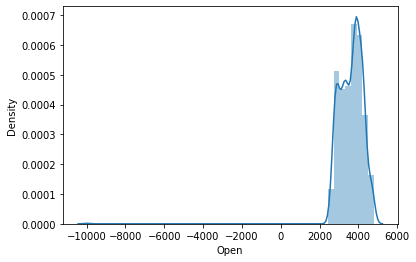

High
-5.837464825169616


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


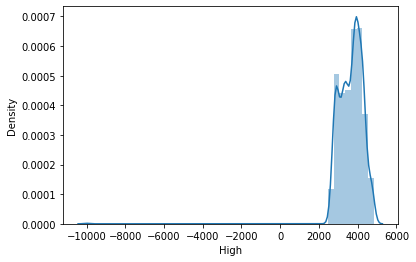

Low
-5.762213382154099


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


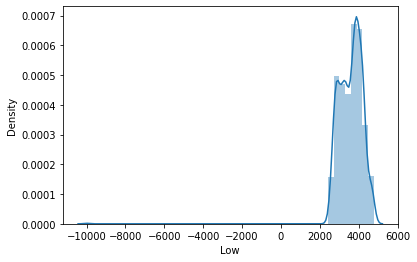

Close
-5.76023489898148


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


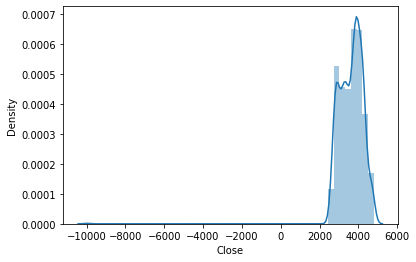

Adj Close
-7.067579725269822


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


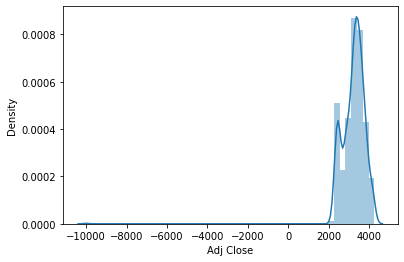

Volume
2.259805989603436


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


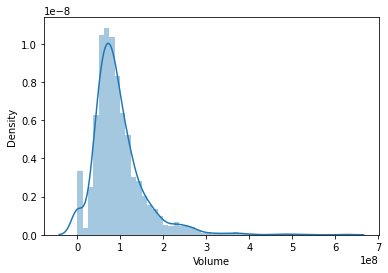

In [914]:
# Visualisasi Skewness Saham Telkomsel
data_tel = dataset_telkom.iloc[:,1:].fillna(-9999)
for kolom in data_tel:
    print(kolom)
    print(skew(data_tel[kolom]))
    
    plt.figure
    sns.distplot(data_tel[kolom])
    plt.show()

##OUtlier

Bagian utama berbentuk Box adalah bidang yang menyajikan inner quartile range **(IQR)**, dimana 50% dari nilai data observasi terletak disana.
**Rumus:** 
      **BOX = IQR = Q3 - Q1**

Garis perpanjangan dari Box (sebelah kanan dan kiri) disebut dengan **whiskers**. 

*   Garis atau batas kotak sebelah kiri atau Lower Quartile (LQ) = Q1 (Kuartil Pertama), dimana 25% data observasi lebih kecil atau sama dengan nilai Q1.

*   Garis tengah pada kotak = Q2 (Median), dimana 50% data observasi lebih kecil atau sama dengan nilai ini.

*   Garis atau batas kotak sebelah kanan atau Upper Quartile (UQ) = Q3 (Kuartil Ketiga), dimana 75% data observasi pengamatan lebih kecil atau sama dengan nilai Q3

Nilai yang berada melewati whiskers dinamakan **nilai outlier** atau **ekstrim**.

*   Nilai Outlier adalah nilai data yang letaknya melebihi 1.5x panjang IQR, diukur dari LQ atau UQ. **Rumus:** 

  1.   **Q3 + (1.5 x IQR) < outlier atas ≤ Q3 + (3 x IQR)**

  2.   **Q1 – (1.5 x IQR) > outlier bawah ≥ Q1 – (3 x IQR)**

*   Nilai ekstrim adalah nilai-nilai yang letaknya melebihi dari 3x panjang kotak (IQR), diukur dari LQ atau UQ.

In [915]:
# Library Outlier
import seaborn as sns

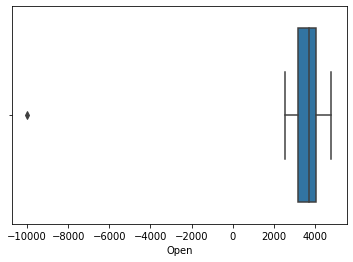

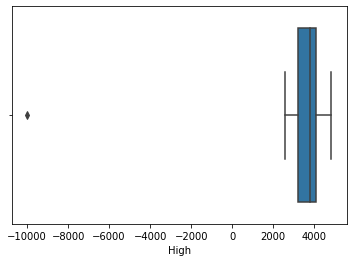

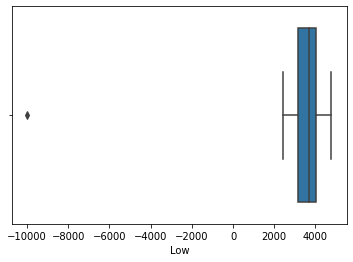

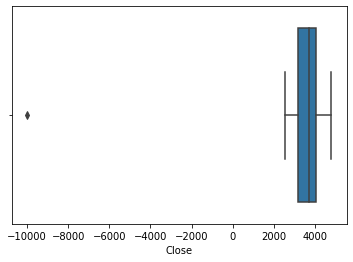

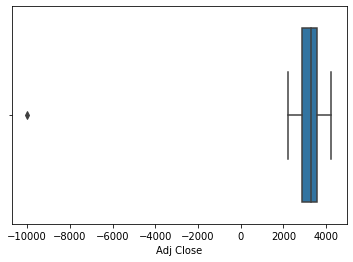

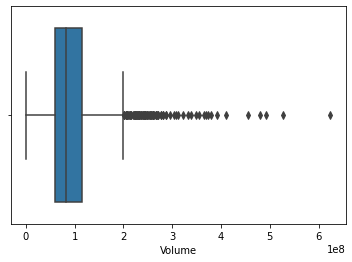

In [916]:
# Outlier Saham Telkomsel
data = dataset_telkom.iloc[:,1:].fillna(-9999)
for kolom in data:
  plt.figure() # Membuat figure baru
  sns.boxplot(x=data[kolom])
  plt.show()

###Open

In [917]:
# Cara mengecek adanya outlier
q1,q3 = np.percentile(data['Open'],[25,75])
  
iqr = q3-q1
batas_min = q1-(1.5*iqr)
batas_max = q3+(1.5*iqr)
batas_min_ekstrim = q1-(3*iqr)
batas_max_ekstrim = q3+(3*iqr)
  
outlier_bwh = data[(data['Open']>=batas_min_ekstrim) & (data['Open']<batas_min)]
outlier_ats = data[(data['Open']>batas_max) & (data['Open']<batas_max_ekstrim)]


In [918]:
outlier_bwh

,Open,High,Low,Close,Adj Close,Volume


In [919]:
outlier_ats

,Open,High,Low,Close,Adj Close,Volume


###High

In [920]:
# Cara mengecek adanya outlier
q1,q3 = np.percentile(data['High'],[25,75])
  
iqr = q3-q1
batas_min = q1-(1.5*iqr)
batas_max = q3+(1.5*iqr)
batas_min_ekstrim = q1-(3*iqr)
batas_max_ekstrim = q3+(3*iqr)
  
outlier_bwh = data[(data['High']>=batas_min_ekstrim) & (data['High']<batas_min)]
outlier_ats = data[(data['High']>batas_max) & (data['High']<batas_max_ekstrim)]


In [921]:
outlier_ats

,Open,High,Low,Close,Adj Close,Volume


In [922]:
outlier_bwh

,Open,High,Low,Close,Adj Close,Volume


###Low

In [923]:
# Cara mengecek adanya outlier
q1,q3 = np.percentile(data['Low'],[25,75])
  
iqr = q3-q1
batas_min = q1-(1.5*iqr)
batas_max = q3+(1.5*iqr)
batas_min_ekstrim = q1-(3*iqr)
batas_max_ekstrim = q3+(3*iqr)
  
outlier_bwh = data[(data['Low']>=batas_min_ekstrim) & (data['Low']<batas_min)]
outlier_ats = data[(data['Low']>batas_max) & (data['Low']<batas_max_ekstrim)]


In [924]:
outlier_ats

,Open,High,Low,Close,Adj Close,Volume


In [925]:
outlier_bwh

,Open,High,Low,Close,Adj Close,Volume


###Close

In [926]:
# Cara mengecek adanya outlier
q1,q3 = np.percentile(data['Close'],[25,75])
  
iqr = q3-q1
batas_min = q1-(1.5*iqr)
batas_max = q3+(1.5*iqr)
batas_min_ekstrim = q1-(3*iqr)
batas_max_ekstrim = q3+(3*iqr)
  
outlier_bwh = data[(data['Close']>=batas_min_ekstrim) & (data['Close']<batas_min)]
outlier_ats = data[(data['Close']>batas_max) & (data['Close']<batas_max_ekstrim)]


In [927]:
outlier_ats

,Open,High,Low,Close,Adj Close,Volume


In [928]:
outlier_bwh

,Open,High,Low,Close,Adj Close,Volume


###Adj Close

In [929]:
# Cara mengecek adanya outlier
q1,q3 = np.percentile(data['Adj Close'],[25,75])
  
iqr = q3-q1
batas_min = q1-(1.5*iqr)
batas_max = q3+(1.5*iqr)
batas_min_ekstrim = q1-(3*iqr)
batas_max_ekstrim = q3+(3*iqr)
  
outlier_bwh = data[(data['Adj Close']>=batas_min_ekstrim) & (data['Adj Close']<batas_min)]
outlier_ats = data[(data['Adj Close']>batas_max) & (data['Adj Close']<batas_max_ekstrim)]


In [930]:
outlier_ats

,Open,High,Low,Close,Adj Close,Volume


In [931]:
outlier_bwh

,Open,High,Low,Close,Adj Close,Volume


###Volume

In [932]:
# Cara mengecek adanya outlier
q1,q3 = np.percentile(data['Volume'],[25,75])
  
iqr = q3-q1
batas_min = q1-(1.5*iqr)
batas_max = q3+(1.5*iqr)
batas_min_ekstrim = q1-(3*iqr)
batas_max_ekstrim = q3+(3*iqr)
  
outlier_bwh = data[(data['Volume']>=batas_min_ekstrim) & (data['Volume']<batas_min)]
outlier_ats = data[(data['Volume']>batas_max) & (data['Volume']<batas_max_ekstrim)]


In [933]:
outlier_ats

,Open,High,Low,Close,Adj Close,Volume
82,2715.0,2730.0,2615.0,2615.0,2233.310547,219284700.0
224,2900.0,2980.0,2900.0,2930.0,2502.332275,248674100.0
300,3380.0,3380.0,3300.0,3305.0,2822.596680,201671300.0
326,3585.0,3595.0,3530.0,3550.0,3031.835938,225310200.0
370,4080.0,4250.0,4030.0,4070.0,3491.448975,270804800.0
...,...,...,...,...,...,...
1511,3590.0,3640.0,3570.0,3600.0,3427.189697,271231200.0
1543,3510.0,3570.0,3450.0,3490.0,3322.469971,226833000.0
1544,3450.0,3510.0,3410.0,3490.0,3322.469971,230007700.0
1602,3350.0,3400.0,3330.0,3380.0,3217.750488,233551300.0


In [934]:
outlier_bwh

,Open,High,Low,Close,Adj Close,Volume


#Preprocessing

Pada tahap pembelajaran ini tidak semua data digunakan dalam proses training. Sehingga dilakukan manipulasi data dalam mendapatkan kategori yang baru. 

Pada jual beli saham, dikenal dengan berapa persen perubahan harga pembukaan hingga harga penutupan pada dari tertentu atau istilah lainnya adalah %change.

%change ini memiliki rumus harga penutupan (close) - harga pembukaan (open) dibagi harga pembukaan (open) dikali 100.

Kemudian terdapat istilah spread/volatility yaitu jangkauan antara nilai maksimum (High) dan minimum (Low) dibagi harga penutupan (close)

referensi: http://melekteknologi.id/tutorial-machine-learning-dengan-python-episode-1-prediksi-harga-saham-dengan-regresi-linier-part-2/

In [935]:
#%Change
dataset_telkom['%Change'] = (dataset_telkom['Close'] - dataset_telkom['Open']) / dataset_telkom['Open'] *100.0

#Spread
dataset_telkom['Spread'] = (dataset_telkom['High'] - dataset_telkom['Low']) / dataset_telkom['Close'] * 100.0

#Membuat dataframe baru
data_baru = dataset_telkom[['Close', 'Spread', '%Change', 'Volume']]
data_baru

,Close,Spread,%Change,Volume
0,2860.0,1.223776,-0.866551,18992100.0
1,2835.0,1.058201,-0.526316,49940700.0
2,2815.0,1.243339,0.177936,47892100.0
3,2810.0,2.669039,-1.919721,70076600.0
4,2835.0,0.705467,-0.176056,56582500.0
...,...,...,...,...
1642,3190.0,1.880878,1.592357,55525800.0
1643,3270.0,3.363914,1.869159,62673400.0
1644,3190.0,3.134796,-1.846154,103282300.0
1645,3230.0,2.786378,0.623053,126542400.0


##Data Cleaning

data cleaning bermaksud membersihkan data sederhana. dengan membersihkan data yang kosong atau data yang bukan suatu angka (not a number), maka dilakukan pergantian dengan angka -99999 agar dibaca menjadi nilai ekstrem dan dapat diabaikan.

In [936]:
# memberikan nilai -99999 untuk data not a number
data_baru.fillna(value= -99999, inplace=True) 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


##Menentukan Jumlah Sampel Prediksi

Pada percobaan ini saya menggunakan 1% dari data awal menjadi sampel data untuk dilakukan prediksi. dengan menggunakan cara shifting.
shifting sendiri adalah cara untuk menggeser atau menghapus 1% data terakhir.
Pada kasus ini yang akan dilakukan shifting ada data harga close dan akan dilakukan prediksi harga close nantinya.

In [937]:
jml_sampel_prekdiksi = int(math.ceil(0.01*len(data_baru)))

# menggeser tabel kolom "Close" ke atas sehingga beberapa nilai terakhir menjadi NaN
data_baru['Output Prediksi'] = data_baru['Close'].shift(-jml_sampel_prekdiksi)
data_baru

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Close,Spread,%Change,Volume,Output Prediksi
0,2860.0,1.223776,-0.866551,18992100.0,2830.0
1,2835.0,1.058201,-0.526316,49940700.0,2845.0
2,2815.0,1.243339,0.177936,47892100.0,2860.0
3,2810.0,2.669039,-1.919721,70076600.0,2830.0
4,2835.0,0.705467,-0.176056,56582500.0,2805.0
...,...,...,...,...,...
1642,3190.0,1.880878,1.592357,55525800.0,NaN
1643,3270.0,3.363914,1.869159,62673400.0,NaN
1644,3190.0,3.134796,-1.846154,103282300.0,NaN
1645,3230.0,2.786378,0.623053,126542400.0,NaN


##Membuat Dataframe baru

In [942]:
data_telkom_X = np.array(data_baru[['Close', 'Volume', '%Change', 'Spread']])
data_telkom_X

array([[ 2.86000000e+03,  1.89921000e+07, -8.66551127e-01,
         1.22377622e+00],
       [ 2.83500000e+03,  4.99407000e+07, -5.26315789e-01,
         1.05820106e+00],
       [ 2.81500000e+03,  4.78921000e+07,  1.77935943e-01,
         1.24333925e+00],
       ...,
       [ 3.19000000e+03,  1.03282300e+08, -1.84615385e+00,
         3.13479624e+00],
       [ 3.23000000e+03,  1.26542400e+08,  6.23052960e-01,
         2.78637771e+00],
       [ 3.24000000e+03,  9.51431000e+07,  1.25000000e+00,
         2.77777778e+00]])

##Normalisasi

Normalisasi data digunakan untuk mempercepat dan mempermudah perhitungan pada machine learning

In [943]:
from sklearn import preprocessing

In [944]:
#Normalisasi dengan mengubah nilai menjadi rentan -1 hingga 1
data_telkom_X = preprocessing.scale(data_telkom_X)

Kemudian dibuat dataframe baru dengan nama data_telkom_X_prediksi yang memiliki elemen 13 data (1%) sedangkan pada data_telkom_X adalah seluruh data kecuali 1% data terakhir(99%).

In [945]:
data_telkom_X_prediksi = data_telkom_X[-jml_sampel_prekdiksi:]
data_telkom_X = data_telkom_X[:-jml_sampel_prekdiksi] #data 99% elemen
data_telkom_X

array([[-0.27247211, -1.24953067,  0.02430062,  0.02426634],
       [-0.28204588, -0.74022884,  0.02443874,  0.02419913],
       [-0.28970491, -0.77394138,  0.02472464,  0.02427428],
       ...,
       [-0.19205239,  1.10148658,  0.02413027,  0.02469517],
       [-0.20354092,  0.64003825,  0.0242557 ,  0.02483784],
       [-0.21502945,  0.93227882,  0.02412   ,  0.02471362]])

Untuk nilai y digunakan dataframe bernama data_telkom_Y. dataframe ini adalah nilai dari dataframe Output Prediksi yang tidak termasuk nilai yang 'not a number' sehingga nilai yang 'not a number' dilakukan drop terlebih dahulu

In [946]:
data_baru.dropna(inplace=True) #menghapus nilai yang 'not a number'/NaN
data_telkom_Y = np.array(data_baru['Output Prediksi']) # varibel ini berisi nilai Output Prediksi
data_telkom_Y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([2830., 2845., 2860., ..., 3190., 3230., 3240.])

##Menentukan Data Training dan Testing

In [947]:
pip install scikit-learn

Sebelum dilakukan proses pembagian data training dan testing, pastikan ukuran pada setiap dataframe sudah sama.

In [948]:
#Mencari ukuran data_telkom_X
data_telkom_X.shape[0]

1630

In [949]:
#Mencari ukuran data_telkom_Y
data_telkom_Y.shape[0]

1630

In [950]:
from sklearn.model_selection import train_test_split

# Membagi data training 80% dan data testing 20%
X_train, X_test, y_train, y_test = train_test_split(data_telkom_X, data_telkom_Y, random_state = 100, test_size=0.2) 


##Training Data

In [951]:
from sklearn.linear_model import LinearRegression

# regresi linier sebagai classifier dengan proses training
linreg = LinearRegression(n_jobs=-1) 
linreg.fit(X_train, y_train) # lakukan training

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

#Melakukan Prediksi

In [952]:
set_prediksi = linreg.predict(data_telkom_X_prediksi) # prediksi nilai y (output)
set_prediksi

array([2998.12132431, 3043.21921378, 3013.78561056, 3199.66403666,
       3230.66205003, 3004.65569667, 3065.04969009, 3094.4151695 ,
       3107.41846675, 3127.29176882, 3139.46477511, 3291.30305596,
       3087.3463654 , 3207.0669848 , 3270.95800731, 3180.05753605,
       3171.84892409])

#Mencari Nilai Confident (Akurasi)

In [953]:
confidence = linreg.score(X_test, y_test) # hitung score
print(confidence) # Nilai akurasi model

0.8331479979359973


#Plot Grafik

In [954]:
dataset_telkom

,Date,Open,High,Low,Close,Adj Close,Volume,%Change,Spread
0,2015-01-02,2885.0,2885.0,2850.0,2860.0,2430.012939,18992100.0,-0.866551,1.223776
1,2015-01-05,2850.0,2850.0,2820.0,2835.0,2408.771484,49940700.0,-0.526316,1.058201
2,2015-01-06,2810.0,2835.0,2800.0,2815.0,2391.778809,47892100.0,0.177936,1.243339
3,2015-01-07,2865.0,2870.0,2795.0,2810.0,2387.530518,70076600.0,-1.919721,2.669039
4,2015-01-08,2840.0,2845.0,2825.0,2835.0,2408.771484,56582500.0,-0.176056,0.705467
...,...,...,...,...,...,...,...,...,...
1642,2021-07-26,3140.0,3200.0,3140.0,3190.0,3190.000000,55525800.0,1.592357,1.880878
1643,2021-07-27,3210.0,3270.0,3160.0,3270.0,3270.000000,62673400.0,1.869159,3.363914
1644,2021-07-28,3250.0,3250.0,3150.0,3190.0,3190.000000,103282300.0,-1.846154,3.134796
1645,2021-07-29,3210.0,3290.0,3200.0,3230.0,3230.000000,126542400.0,0.623053,2.786378


In [955]:
# Membuat dataframe baru yang berisi nilai prediksi harga saham
data_baru = dataset_telkom[['Date', 'Close', 'Spread', '%Change', 'Volume']]
data_baru['Prediksi'] = np.nan
data_baru

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Close,Spread,%Change,Volume,Prediksi
0,2015-01-02,2860.0,1.223776,-0.866551,18992100.0,NaN
1,2015-01-05,2835.0,1.058201,-0.526316,49940700.0,NaN
2,2015-01-06,2815.0,1.243339,0.177936,47892100.0,NaN
3,2015-01-07,2810.0,2.669039,-1.919721,70076600.0,NaN
4,2015-01-08,2835.0,0.705467,-0.176056,56582500.0,NaN
...,...,...,...,...,...,...
1642,2021-07-26,3190.0,1.880878,1.592357,55525800.0,NaN
1643,2021-07-27,3270.0,3.363914,1.869159,62673400.0,NaN
1644,2021-07-28,3190.0,3.134796,-1.846154,103282300.0,NaN
1645,2021-07-29,3230.0,2.786378,0.623053,126542400.0,NaN


In [956]:
data_baru.index = pd.to_datetime(data_baru.Date)
data_baru

,Date,Close,Spread,%Change,Volume,Prediksi
Date,,,,,,
2015-01-02,2015-01-02,2860.0,1.223776,-0.866551,18992100.0,NaN
2015-01-05,2015-01-05,2835.0,1.058201,-0.526316,49940700.0,NaN
2015-01-06,2015-01-06,2815.0,1.243339,0.177936,47892100.0,NaN
2015-01-07,2015-01-07,2810.0,2.669039,-1.919721,70076600.0,NaN
2015-01-08,2015-01-08,2835.0,0.705467,-0.176056,56582500.0,NaN
...,...,...,...,...,...,...
2021-07-26,2021-07-26,3190.0,1.880878,1.592357,55525800.0,NaN
2021-07-27,2021-07-27,3270.0,3.363914,1.869159,62673400.0,NaN
2021-07-28,2021-07-28,3190.0,3.134796,-1.846154,103282300.0,NaN


In [957]:
import time;
import datetime

In [958]:
# mendapatkan tanggal terakhir sebelum data prediksi
tgl_terakhir = data_baru.iloc[-1].name
tgl_terakhir
#tgl_terakhir = time.mktime(datetime.datetime.strptime(tgl_terakhir, "%Y-%m-%d").timetuple())

Timestamp('2021-07-30 00:00:00')

In [959]:
dtk_terakhir = tgl_terakhir.timestamp()
satu_hari = 86400 # detik =  1 hari
dtk_selanjutnya = dtk_terakhir + satu_hari

In [960]:
# untuk semua nilai yang telah di prediksi
for i in set_prediksi: 
  # hitung tanggal selanjutnya
  tgl_selanjutnya = datetime.datetime.fromtimestamp(dtk_selanjutnya) 
  # tambahkan detik selanjutnya menjadi satu hari berikutnya
  dtk_selanjutnya += 86400 
  # tambahkan elemen i (nilai prediksi)
  data_baru.loc[tgl_selanjutnya] = [np.nan for _ in range(len(data_baru.columns)-1)]+[i] 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Membuat gambar grafik pada prediksi Harga Close Saham Telkomsel dengan menggunakan plot()

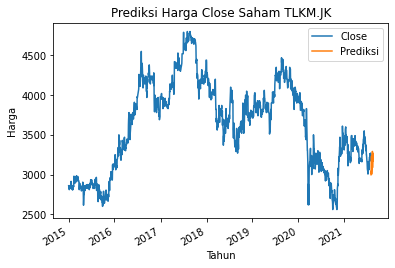

In [961]:
data_baru['Close'].plot()
data_baru['Prediksi'].plot()
plt.legend()
plt.xlabel('Tahun')
plt.ylabel('Harga')
plt.title('Prediksi Harga Close Saham TLKM.JK')
plt.show()